In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [83]:
def parse_filename(filename):
    patient_code, operation_status, wall_type = filename.split("_")[-3:]
    return patient_code, operation_status, wall_type


def get_length_from_segment_coordinates(segment_coordinates):
    """
    coords: listlike of 4 numbers x1,y1,x2,y2
    returns: squared distance between segment endpoints
    """
    p1, p2 = np.reshape(segment_coordinates, (2, 2))
    diff = p2 - p1
    dot = np.dot(diff, diff)
    return dot


def parse_header(string):
    numbers = list(map(int, string.split()))
    end_systolic_id = numbers[0]
    calibration_segment_coordinates = numbers[1:]
    pixels_per_cm = get_length_from_segment_coordinates(calibration_segment_coordinates)
    header_info = {"end_systolic_id": end_systolic_id, "pixels_per_cm": pixels_per_cm}
    return header_info


def read_contour_file(path):
    patient_code, operation_status, wall_type = parse_filename(path.stem)
    with open(path, "r") as f:
        header = f.readline()
        header_info = parse_header(header)
    coordinates = np.loadtxt(path, skiprows=1).astype(int)
    coordinates = coordinates.reshape(coordinates.shape[0], -1, 2)[:, :, ::-1]
    coordinates = coordinates.transpose(0, 2, 1)
    contour_info = header_info.copy()
    contour_info["coordinates"] = coordinates
    return contour_info

In [84]:
files = sorted(Path("../raw_data/2022/examples/").iterdir())

In [85]:
contours = [read_contour_file(f) for f in files]

In [86]:
contours[1]

{'end_systolic_id': 19,
 'pixels_per_cm': 365,
 'coordinates': array([[[340, 322, 317, ..., 485, 499, 475],
         [431, 383, 326, ..., 288, 368, 440]],
 
        [[341, 326, 320, ..., 485, 499, 475],
         [431, 383, 325, ..., 288, 368, 440]],
 
        [[339, 330, 323, ..., 485, 499, 475],
         [431, 383, 325, ..., 288, 368, 440]],
 
        ...,
 
        [[349, 316, 313, ..., 484, 504, 482],
         [442, 395, 328, ..., 286, 367, 433]],
 
        [[349, 316, 314, ..., 484, 504, 482],
         [442, 395, 327, ..., 286, 367, 433]],
 
        [[348, 317, 315, ..., 484, 504, 482],
         [440, 392, 326, ..., 286, 367, 433]]])}

In [87]:
coords = contours[0]["coordinates"]

In [88]:
coords.shape

(56, 2, 9)

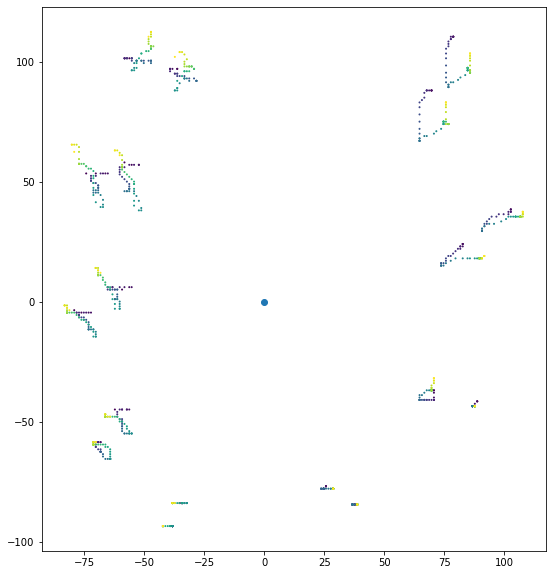

In [120]:
plt.figure(figsize=(10, 10))
for cont in contours:
    coords = cont["coordinates"].copy()
    com = coords.mean(axis=(0, 2), keepdims=True)
    coords = coords - com
    t = np.arange(coords.shape[0])
    for c in coords.transpose(2, 1, 0):
        plt.scatter(*(c), c=t, cmap="viridis", s=1)
plt.scatter(0, 0)
plt.gca().set_aspect("equal")

In [91]:
import scipy.ndimage

In [105]:
com.shape

(1, 2, 1)